In [1]:
import os, sys
if os.path.exists("./src"):
    directory_to_prepend = os.path.abspath("./src")
else:
    raise RuntimeError("'src' is not in path")

print(f"-> src path found in: '{directory_to_prepend}")

if directory_to_prepend not in sys.path:
    sys.path = [directory_to_prepend] + sys.path

-> src path found in: '/home/gergedan/academy/shnn-repo/src


In [2]:
from joblib import load
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from experiment import SampledExperiment, SampledModels
from model.s_hnn import S_HNN
from model.s_mlp import S_MLP

COLOR_TRUTH = '#000000'
COLOR_ELM = '#05c9ff' # blue
COLOR_USWIM = '#ff0000' # red
COLOR_ASWIM = '#28fa02' # green
COLOR_SWIM = '#ffff00' # yellow

# Configure MPL parameters (taken from https://github.com/jbmouret/matplotlib_for_papers)
golden_ratio = (5**.5 - 1) / 2
params = {
    'figure.figsize': [5, 5*golden_ratio],
    "text.usetex": True,
    "font.family": "serif",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}

# scaling params
NETWORK_WIDTHS = range(100, 2100, 100) # [100,100,...2000]
TRAIN_SIZES = range(1000, 21000, 1000) #[1000, 2000, .. , 20000]

def get_width_experiment_results(domain):    
    error_means = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    error_lows  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    error_highs = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_means  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_lows   = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_highs  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }

    for n in NETWORK_WIDTHS:
        experiment: SampledExperiment = load(f"experiments/single-pendulum/{domain}_domain_experiment_hidden_{n}.pkl")
    
        error_means["elm"].append(np.mean(experiment.results.elm_test_H_errors))
        error_lows["elm"].append(np.min(experiment.results.elm_test_H_errors))
        error_highs["elm"].append(np.max(experiment.results.elm_test_H_errors))
        time_means["elm"].append(np.mean(experiment.results.elm_train_times))
        time_lows["elm"].append(np.min(experiment.results.elm_train_times))
        time_highs["elm"].append(np.max(experiment.results.elm_train_times))

        error_means["uswim"].append(np.mean(experiment.results.uswim_test_H_errors))
        error_lows["uswim"].append(np.min(experiment.results.uswim_test_H_errors))
        error_highs["uswim"].append(np.max(experiment.results.uswim_test_H_errors))
        time_means["uswim"].append(np.mean(experiment.results.uswim_train_times))
        time_lows["uswim"].append(np.min(experiment.results.uswim_train_times))
        time_highs["uswim"].append(np.max(experiment.results.uswim_train_times))

        error_means["aswim"].append(np.mean(experiment.results.aswim_test_H_errors))
        error_lows["aswim"].append(np.min(experiment.results.aswim_test_H_errors))
        error_highs["aswim"].append(np.max(experiment.results.aswim_test_H_errors))
        time_means["aswim"].append(np.mean(experiment.results.aswim_train_times))
        time_lows["aswim"].append(np.min(experiment.results.aswim_train_times))
        time_highs["aswim"].append(np.max(experiment.results.aswim_train_times))

        error_means["swim"].append(np.mean(experiment.results.swim_test_H_errors))
        error_lows["swim"].append(np.min(experiment.results.swim_test_H_errors))
        error_highs["swim"].append(np.max(experiment.results.swim_test_H_errors))
        time_means["swim"].append(np.mean(experiment.results.swim_train_times))
        time_lows["swim"].append(np.min(experiment.results.swim_train_times))
        time_highs["swim"].append(np.max(experiment.results.swim_train_times))

    return error_means, error_lows, error_highs, time_means, time_lows, time_highs

def get_freq_experiment_results(freq):
    train_sizes = range(1000, 21000, 1000) #[1000, 2000, .. , 20000]
    
    error_means = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    error_lows  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    error_highs = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_means  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_lows   = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_highs  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }

    for n in train_sizes:
        experiment: SampledExperiment = load(f"experiments/single-pendulum-freq/freq_{freq}_experiment_train_size_{n}.pkl")

        error_means["elm"].append(np.mean(experiment.results.elm_test_H_errors))
        error_lows["elm"].append(np.min(experiment.results.elm_test_H_errors))
        error_highs["elm"].append(np.max(experiment.results.elm_test_H_errors))
        time_means["elm"].append(np.mean(experiment.results.elm_train_times))
        time_lows["elm"].append(np.min(experiment.results.elm_train_times))
        time_highs["elm"].append(np.max(experiment.results.elm_train_times))

        error_means["uswim"].append(np.mean(experiment.results.uswim_test_H_errors))
        error_lows["uswim"].append(np.min(experiment.results.uswim_test_H_errors))
        error_highs["uswim"].append(np.max(experiment.results.uswim_test_H_errors))
        time_means["uswim"].append(np.mean(experiment.results.uswim_train_times))
        time_lows["uswim"].append(np.min(experiment.results.uswim_train_times))
        time_highs["uswim"].append(np.max(experiment.results.uswim_train_times))

        error_means["aswim"].append(np.mean(experiment.results.aswim_test_H_errors))
        error_lows["aswim"].append(np.min(experiment.results.aswim_test_H_errors))
        error_highs["aswim"].append(np.max(experiment.results.aswim_test_H_errors))
        time_means["aswim"].append(np.mean(experiment.results.aswim_train_times))
        time_lows["aswim"].append(np.min(experiment.results.aswim_train_times))
        time_highs["aswim"].append(np.max(experiment.results.aswim_train_times))

        error_means["swim"].append(np.mean(experiment.results.swim_test_H_errors))
        error_lows["swim"].append(np.min(experiment.results.swim_test_H_errors))
        error_highs["swim"].append(np.max(experiment.results.swim_test_H_errors))
        time_means["swim"].append(np.mean(experiment.results.swim_train_times))
        time_lows["swim"].append(np.min(experiment.results.swim_train_times))
        time_highs["swim"].append(np.max(experiment.results.swim_train_times))

    return error_means, error_lows, error_highs, time_means, time_lows, time_highs

In [3]:
# overview of the domain params and model params of the Lotka-Volterra experiments
experiment: SampledExperiment = load("experiments/single-pendulum/small_domain_experiment_hidden_2000.pkl")
print("Small domain experiment")
print("-----------------------------------------")
print("DOMAIN_PARAMS:", experiment.domain_params)
print("MODEL_PARAMS:", experiment.model_params)
print("-----------------------------------------")

experiment: SampledExperiment = load("experiments/single-pendulum/large_domain_experiment_hidden_2000.pkl")
print("Large domain experiment")
print("-----------------------------------------")
print("DOMAIN_PARAMS:", experiment.domain_params)
print("MODEL_PARAMS:", experiment.model_params)
print("-----------------------------------------")

experiment: SampledExperiment = load("experiments/single-pendulum-freq/freq_10_experiment_train_size_20000.pkl")
print("Freq=10 experiment")
print("-----------------------------------------")
print("DOMAIN_PARAMS:", experiment.domain_params)
print("MODEL_PARAMS:", experiment.model_params)
print("-----------------------------------------")

experiment: SampledExperiment = load("experiments/single-pendulum-freq/freq_15_experiment_train_size_20000.pkl")
print("Freq=15 experiment")
print("-----------------------------------------")
print("DOMAIN_PARAMS:", experiment.domain_params)
print("MODEL_PARAMS:", experiment.model_params)
print("-----------------------------------------")

experiment: SampledExperiment = load("experiments/single-pendulum-freq/freq_20_experiment_train_size_20000.pkl")
print("Freq=20 experiment")
print("-----------------------------------------")
print("DOMAIN_PARAMS:", experiment.domain_params)
print("MODEL_PARAMS:", experiment.model_params)
print("-----------------------------------------")

Small domain experiment
-----------------------------------------
DOMAIN_PARAMS: SampledDomainParams(target=<hamiltonian.single_pendulum.SinglePendulum object at 0x73808264c4d0>, q_lims=[[-6.283185307179586, 6.283185307179586]], p_lims=[[-1.0, 1.0]], train_size=10000, test_size=10000, repeat=10, start_data_random_seed=3943)
MODEL_PARAMS: SampledModelParams(activation=<ActivationType.TANH: 'tanh'>, network_width=2000, resample_duplicates=True, rcond=1e-13, elm_bias_start=np.float64(-6.283185307179586), elm_bias_end=np.float64(6.283185307179586), start_model_random_seed=992472)
-----------------------------------------
Large domain experiment
-----------------------------------------
DOMAIN_PARAMS: SampledDomainParams(target=<hamiltonian.single_pendulum.SinglePendulum object at 0x738132710c80>, q_lims=[[-6.283185307179586, 6.283185307179586]], p_lims=[[-6.0, 6.0]], train_size=10000, test_size=10000, repeat=10, start_data_random_seed=3943)
MODEL_PARAMS: SampledModelParams(activation=<Acti

# Single pendulum domain experiments

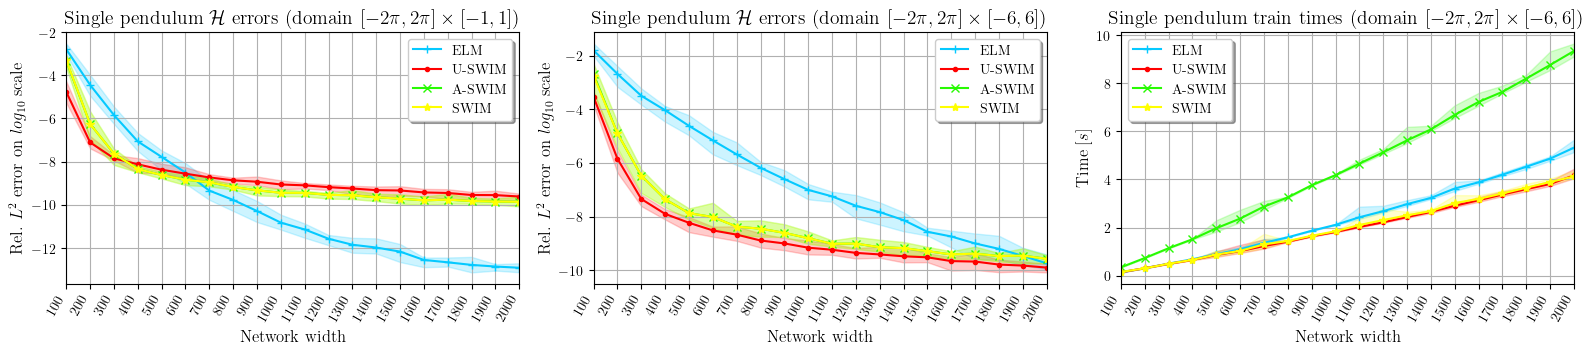

In [4]:
golden_ratio = (5**.5 - 1) / 2
mpl.rcParams.update(params)
%matplotlib inline

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(16,6*golden_ratio), dpi=100)

# left plot (smaller domain)
error_means, error_lows, error_highs, _, _, _ = get_width_experiment_results(domain="small")

ax1.set_title(r"Single pendulum $\mathcal{H}$ errors (domain $[-2\pi,2\pi]\times[-1,1]$)")
ax1.plot(NETWORK_WIDTHS, np.log10(error_means["elm"]), c=COLOR_ELM, marker="+") # light blue
ax1.plot(NETWORK_WIDTHS, np.log10(error_means["uswim"]), c=COLOR_USWIM, marker=".") # light red
ax1.plot(NETWORK_WIDTHS, np.log10(error_means["aswim"]), c=COLOR_ASWIM, marker="x") # light green
ax1.plot(NETWORK_WIDTHS, np.log10(error_means["swim"]), c=COLOR_SWIM, marker="*") # light yellow
ax1.fill_between(NETWORK_WIDTHS, np.log10(error_lows["elm"]), np.log10(error_highs["elm"]), color=COLOR_ELM, alpha=0.2)
ax1.fill_between(NETWORK_WIDTHS, np.log10(error_lows["uswim"]), np.log10(error_highs["uswim"]), color=COLOR_USWIM, alpha=0.2)
ax1.fill_between(NETWORK_WIDTHS, np.log10(error_lows["aswim"]), np.log10(error_highs["aswim"]), color=COLOR_ASWIM, alpha=0.2)
ax1.fill_between(NETWORK_WIDTHS, np.log10(error_lows["swim"]), np.log10(error_highs["swim"]), color=COLOR_SWIM, alpha=0.2)
ax1.set_xticks(NETWORK_WIDTHS)
ax1.set_xticklabels(NETWORK_WIDTHS, rotation=60, ha="right")
ax1.set_xlim([np.min(NETWORK_WIDTHS), np.max(NETWORK_WIDTHS)])
ax1.set_xlabel(r"Network width")
ax1.set_ylabel(r"Rel. $L^{2}$ error on $log_{10}$ scale")
ax1.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], shadow=True, loc="best")
ax1.grid()

# middle plot (larger domain)
error_means, error_lows, error_highs, time_means, time_lows, time_highs = get_width_experiment_results(domain="large")

ax2.set_title(r"Single pendulum $\mathcal{H}$ errors (domain $[-2\pi,2\pi]\times[-6,6]$)")
ax2.plot(NETWORK_WIDTHS, np.log10(error_means["elm"]), c=COLOR_ELM, marker="+") # light blue
ax2.plot(NETWORK_WIDTHS, np.log10(error_means["uswim"]), c=COLOR_USWIM, marker=".") # light red
ax2.plot(NETWORK_WIDTHS, np.log10(error_means["aswim"]), c=COLOR_ASWIM, marker="x") # light green
ax2.plot(NETWORK_WIDTHS, np.log10(error_means["swim"]), c=COLOR_SWIM, marker="*") # light yellow
ax2.fill_between(NETWORK_WIDTHS, np.log10(error_lows["elm"]), np.log10(error_highs["elm"]), color=COLOR_ELM, alpha=0.2)
ax2.fill_between(NETWORK_WIDTHS, np.log10(error_lows["uswim"]), np.log10(error_highs["uswim"]), color=COLOR_USWIM, alpha=0.2)
ax2.fill_between(NETWORK_WIDTHS, np.log10(error_lows["aswim"]), np.log10(error_highs["aswim"]), color=COLOR_ASWIM, alpha=0.2)
ax2.fill_between(NETWORK_WIDTHS, np.log10(error_lows["swim"]), np.log10(error_highs["swim"]), color=COLOR_SWIM, alpha=0.2)
ax2.set_xticks(NETWORK_WIDTHS)
ax2.set_xticklabels(NETWORK_WIDTHS, rotation=60, ha="right")
ax2.set_xlim([np.min(NETWORK_WIDTHS), np.max(NETWORK_WIDTHS)])
ax2.set_xlabel(r"Network width")
ax2.set_ylabel(r"Rel. $L^{2}$ error on $log_{10}$ scale")
ax2.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], shadow=True, loc="best")
ax2.grid()

# right plot (train times for the larger domain, for smaller domain it is very similar so we only plot one of them for demonstration)
ax3.set_title(r"Single pendulum train times (domain $[-2\pi,2\pi]\times[-6,6]$)")
ax3.plot(NETWORK_WIDTHS, time_means["elm"], c=COLOR_ELM, marker="+") # light blue
ax3.plot(NETWORK_WIDTHS, time_means["uswim"], c=COLOR_USWIM, marker=".") # light red
ax3.plot(NETWORK_WIDTHS, time_means["aswim"], c=COLOR_ASWIM, marker="x") # light green
ax3.plot(NETWORK_WIDTHS, time_means["swim"], c=COLOR_SWIM, marker="*") # light yellow
ax3.fill_between(NETWORK_WIDTHS, time_lows["elm"], time_highs["elm"], color=COLOR_ELM, alpha=0.2)
ax3.fill_between(NETWORK_WIDTHS, time_lows["uswim"], time_highs["uswim"], color=COLOR_USWIM, alpha=0.2)
ax3.fill_between(NETWORK_WIDTHS, time_lows["aswim"], time_highs["aswim"], color=COLOR_ASWIM, alpha=0.2)
ax3.fill_between(NETWORK_WIDTHS, time_lows["swim"], time_highs["swim"], color=COLOR_SWIM, alpha=0.2)
ax3.set_xticks(NETWORK_WIDTHS)
ax3.set_xticklabels(NETWORK_WIDTHS, rotation=60, ha="right")
ax3.set_xlim([np.min(NETWORK_WIDTHS), np.max(NETWORK_WIDTHS)])
ax3.set_xlabel(r"Network width")
ax3.set_ylabel(r"Time $[s]$")
ax3.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], shadow=True, loc="best")
ax3.grid()

fig.tight_layout()
fig.savefig("plots/single-pendulum-fig.pdf")

# Single pendulum frequency experiments

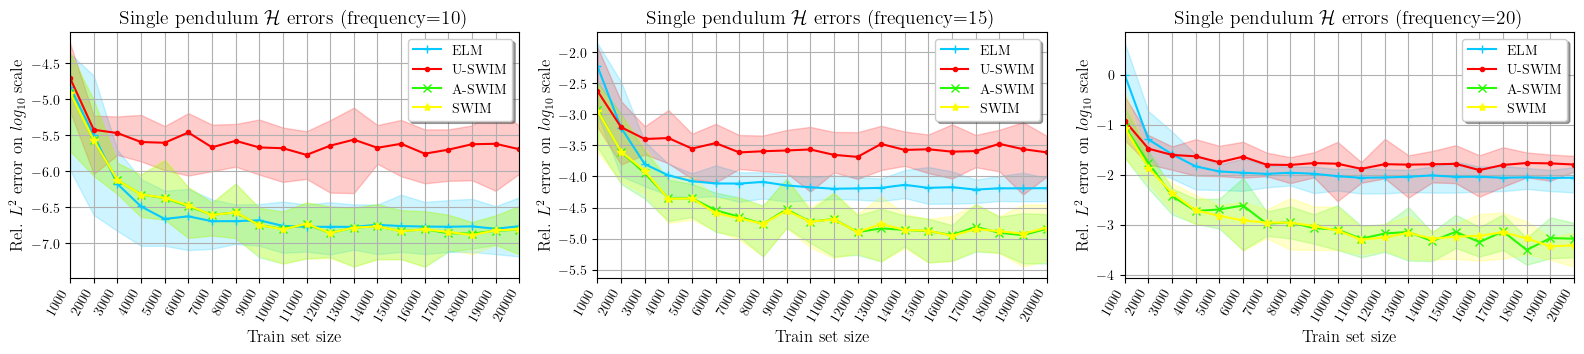

In [5]:
golden_ratio = (5**.5 - 1) / 2
mpl.rcParams.update(params)
%matplotlib inline

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(16,6*golden_ratio), dpi=100)

# left plot (freq=10)
error_means, error_lows, error_highs, _, _, _ = get_freq_experiment_results(freq=10)

ax1.set_title(r"Single pendulum $\mathcal{H}$ errors (frequency=10)")
ax1.plot(TRAIN_SIZES, np.log10(error_means["elm"]), c=COLOR_ELM, marker="+") # light blue
ax1.plot(TRAIN_SIZES, np.log10(error_means["uswim"]), c=COLOR_USWIM, marker=".") # light red
ax1.plot(TRAIN_SIZES, np.log10(error_means["aswim"]), c=COLOR_ASWIM, marker="x") # light green
ax1.plot(TRAIN_SIZES, np.log10(error_means["swim"]), c=COLOR_SWIM, marker="*") # light yellow
ax1.fill_between(TRAIN_SIZES, np.log10(error_lows["elm"]), np.log10(error_highs["elm"]), color=COLOR_ELM, alpha=0.2)
ax1.fill_between(TRAIN_SIZES, np.log10(error_lows["uswim"]), np.log10(error_highs["uswim"]), color=COLOR_USWIM, alpha=0.2)
ax1.fill_between(TRAIN_SIZES, np.log10(error_lows["aswim"]), np.log10(error_highs["aswim"]), color=COLOR_ASWIM, alpha=0.2)
ax1.fill_between(TRAIN_SIZES, np.log10(error_lows["swim"]), np.log10(error_highs["swim"]), color=COLOR_SWIM, alpha=0.2)
ax1.set_xticks(TRAIN_SIZES)
ax1.set_xticklabels(TRAIN_SIZES, rotation=60, ha="right")
ax1.set_xlim([np.min(TRAIN_SIZES), np.max(TRAIN_SIZES)])
ax1.set_xlabel(r"Train set size")
ax1.set_ylabel(r"Rel. $L^{2}$ error on $log_{10}$ scale")
ax1.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], shadow=True, loc="best")
ax1.grid()

# middle plot (freq=15)
error_means, error_lows, error_highs, _, _, _ = get_freq_experiment_results(freq=15)

ax2.set_title(r"Single pendulum $\mathcal{H}$ errors (frequency=15)")
ax2.plot(TRAIN_SIZES, np.log10(error_means["elm"]), c=COLOR_ELM, marker="+") # light blue
ax2.plot(TRAIN_SIZES, np.log10(error_means["uswim"]), c=COLOR_USWIM, marker=".") # light red
ax2.plot(TRAIN_SIZES, np.log10(error_means["aswim"]), c=COLOR_ASWIM, marker="x") # light green
ax2.plot(TRAIN_SIZES, np.log10(error_means["swim"]), c=COLOR_SWIM, marker="*") # light yellow
ax2.fill_between(TRAIN_SIZES, np.log10(error_lows["elm"]), np.log10(error_highs["elm"]), color=COLOR_ELM, alpha=0.2)
ax2.fill_between(TRAIN_SIZES, np.log10(error_lows["uswim"]), np.log10(error_highs["uswim"]), color=COLOR_USWIM, alpha=0.2)
ax2.fill_between(TRAIN_SIZES, np.log10(error_lows["aswim"]), np.log10(error_highs["aswim"]), color=COLOR_ASWIM, alpha=0.2)
ax2.fill_between(TRAIN_SIZES, np.log10(error_lows["swim"]), np.log10(error_highs["swim"]), color=COLOR_SWIM, alpha=0.2)
ax2.set_xticks(TRAIN_SIZES)
ax2.set_xticklabels(TRAIN_SIZES, rotation=60, ha="right")
ax2.set_xlim([np.min(TRAIN_SIZES), np.max(TRAIN_SIZES)])
ax2.set_xlabel(r"Train set size")
ax2.set_ylabel(r"Rel. $L^{2}$ error on $log_{10}$ scale")
ax2.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], shadow=True, loc="best")
ax2.grid()

# right plot (freq=20)
error_means, error_lows, error_highs, _, _, _ = get_freq_experiment_results(freq=20)

ax3.set_title(r"Single pendulum $\mathcal{H}$ errors (frequency=20)")
ax3.plot(TRAIN_SIZES, np.log10(error_means["elm"]), c=COLOR_ELM, marker="+") # light blue
ax3.plot(TRAIN_SIZES, np.log10(error_means["uswim"]), c=COLOR_USWIM, marker=".") # light red
ax3.plot(TRAIN_SIZES, np.log10(error_means["aswim"]), c=COLOR_ASWIM, marker="x") # light green
ax3.plot(TRAIN_SIZES, np.log10(error_means["swim"]), c=COLOR_SWIM, marker="*") # light yellow
ax3.fill_between(TRAIN_SIZES, np.log10(error_lows["elm"]), np.log10(error_highs["elm"]), color=COLOR_ELM, alpha=0.2)
ax3.fill_between(TRAIN_SIZES, np.log10(error_lows["uswim"]), np.log10(error_highs["uswim"]), color=COLOR_USWIM, alpha=0.2)
ax3.fill_between(TRAIN_SIZES, np.log10(error_lows["aswim"]), np.log10(error_highs["aswim"]), color=COLOR_ASWIM, alpha=0.2)
ax3.fill_between(TRAIN_SIZES, np.log10(error_lows["swim"]), np.log10(error_highs["swim"]), color=COLOR_SWIM, alpha=0.2)
ax3.set_xticks(TRAIN_SIZES)
ax3.set_xticklabels(TRAIN_SIZES, rotation=60, ha="right")
ax3.set_xlim([np.min(TRAIN_SIZES), np.max(TRAIN_SIZES)])
ax3.set_xlabel(r"Train set size")
ax3.set_ylabel(r"Rel. $L^{2}$ error on $log_{10}$ scale")
ax3.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], shadow=True, loc="best")
ax3.grid()

fig.tight_layout()
fig.savefig("plots/single-pendulum-freq-errors.pdf")

# S-MLP and S-HNN comparison demonstrating energy conservation of HNNs

-> integrating ground truth equations
-> integrating sampled MLP
-> integrating sampled HNN


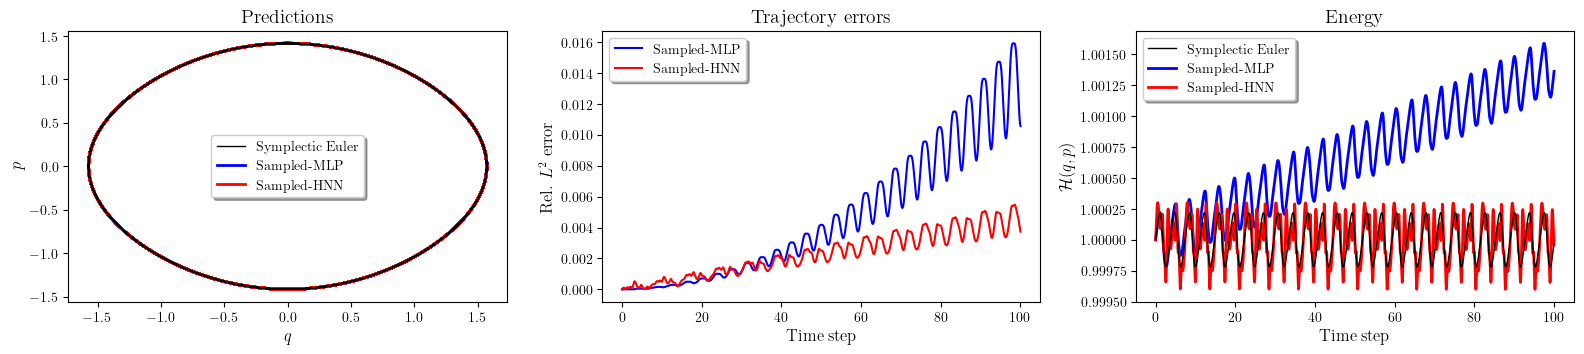

In [6]:
# train a sampled MLP and analyze conserved energy for the larger domain with 500 neurons for demonstration

from data import get_train_test_set
from hamiltonian.single_pendulum import SinglePendulum
from activation import ActivationType
from trainer.sampler import Sampler
from model.sampled_network_type import SampledNetworkType
from trainer.param_sampler import ParameterSampler
from util.device_type import DeviceType
from error import l2_error_rel
from integrator import SemiImplicitEuler

experiment: SampledExperiment = load("experiments/single-pendulum/large_domain_experiment_hidden_500.pkl")
domain_params = experiment.domain_params
model_params = experiment.model_params

single_pendulum = SinglePendulum()

train_set, test_set = get_train_test_set(1, single_pendulum, domain_params.train_size, domain_params.test_size, domain_params.q_lims, domain_params.p_lims, rng = np.random.default_rng(domain_params.start_data_random_seed))

( (train_inputs, train_dt_truths, train_H_truths, train_H_grad_truths), (train_x_0, train_x_0_H_truth) ) = train_set
( test_inputs, test_dt_truths, test_H_truths, test_H_grad_truths ) = test_set
        
s_mlp = S_MLP(input_dim=2, hidden_dim=model_params.network_width, output_dim=2, activation=ActivationType.TANH, resample_duplicates=model_params.resample_duplicates, rcond=model_params.rcond, random_seed=model_params.start_model_random_seed, elm_bias_start=model_params.elm_bias_start, elm_bias_end=model_params.elm_bias_end)
s_hnn = S_HNN(input_dim=2, hidden_dim=model_params.network_width, activation=ActivationType.TANH, resample_duplicates=model_params.resample_duplicates, rcond=model_params.rcond, random_seed=model_params.start_model_random_seed, elm_bias_start=model_params.elm_bias_start, elm_bias_end=model_params.elm_bias_end)

sampler = Sampler(SampledNetworkType.ELM, ParameterSampler.A_PRIORI)

sampler.train(s_mlp, train_inputs, train_dt_truths, train_x_0, train_x_0_H_truth, DeviceType.CPU)
sampler.train(s_hnn, train_inputs, train_dt_truths, train_x_0, train_x_0_H_truth, DeviceType.CPU)

semi_implicit_euler = SemiImplicitEuler()

t_span = [0, 100]
n_steps = 200000
t_eval = np.linspace(t_span[0], t_span[1], n_steps)
#y0 = [-1, 0]
#y0 = [0.02, 0.1]
y0 = [np.pi/2, 0]

time_step = (t_span[1] - t_span[0]) / n_steps

print(f"-> integrating ground truth equations")
traj_true = np.array([y0])
for i in range(n_steps-1):
    y_next = semi_implicit_euler.step(traj_true[-1].reshape(1,-1), single_pendulum.H_grad, time_step)
    traj_true = np.append(traj_true, y_next, axis=0)

print(f"-> integrating sampled MLP")
traj_pred_s_mlp = np.array([y0])
for i in range(n_steps-1):
    y_next = semi_implicit_euler.step(traj_pred_s_mlp[-1].reshape(1,-1), s_mlp.H_grad, time_step)
    traj_pred_s_mlp = np.append(traj_pred_s_mlp, y_next, axis=0)

print(f"-> integrating sampled HNN")
traj_pred_s_hnn = np.array([y0])
for i in range(n_steps-1):
    y_next = semi_implicit_euler.step(traj_pred_s_hnn[-1].reshape(1,-1), s_hnn.H_grad, time_step)
    traj_pred_s_hnn = np.append(traj_pred_s_hnn, y_next, axis=0)


fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(16,6*golden_ratio), dpi=100)
ax1.set_title(r"Predictions")
ax1.plot(traj_true[:, 0], traj_true[:, 1], c="black", zorder=2, linewidth=1)
ax1.plot(traj_pred_s_mlp[:, 0], traj_pred_s_mlp[:, 1], c="blue", zorder=1, linewidth=2)
ax1.plot(traj_pred_s_hnn[:, 0], traj_pred_s_hnn[:, 1], c="red", zorder=1, linewidth=2)
ax1.set_xlabel(r"$q$")
ax1.set_ylabel(r"$p$")
ax1.legend(["Symplectic Euler", "Sampled-MLP", "Sampled-HNN"], shadow=True, loc="best")

rl2_error_s_mlp = [ l2_error_rel(traj_true[i], traj_pred_s_mlp[i]) for i in range(len(t_eval)) ]
rl2_error_s_hnn = [ l2_error_rel(traj_true[i], traj_pred_s_hnn[i]) for i in range(len(t_eval)) ]
ax2.set_title("Trajectory errors")
ax2.plot(t_eval, rl2_error_s_mlp, c="blue")
ax2.plot(t_eval, rl2_error_s_hnn, c="red")
ax2.set_xlabel(r"Time step")
ax2.set_ylabel("Rel. $L^2$ error")
ax2.legend(["Sampled-MLP", "Sampled-HNN"], shadow=True, loc="best")

energy_true = single_pendulum.H(traj_true)
energy_s_mlp = single_pendulum.H(traj_pred_s_mlp)
energy_s_hnn = single_pendulum.H(traj_pred_s_hnn)
ax3.set_title("Energy")
ax3.plot(t_eval, energy_true, c="black", zorder=2, linewidth=1)
ax3.plot(t_eval, energy_s_mlp, c="blue", zorder=1, linewidth=2)
ax3.plot(t_eval, energy_s_hnn, c="red", zorder=1, linewidth=2)
ax3.set_xlabel("Time step")
ax3.set_ylabel(r"$\mathcal{H}(q,p)$")
ax3.legend(["Symplectic Euler", "Sampled-MLP", "Sampled-HNN"], shadow=True, loc="best")

fig.tight_layout()
fig.savefig("plots/energy-conservation.pdf")

In [7]:
# Analyze the error at network width 1000
error_means, _, _, time_means, _, _ = get_width_experiment_results(domain="small")

print("Errors at network width 1000")
index = 9 # network width 1000 is at index 9
print(f"ELM    : {error_means["elm"][index]   : .2E}") # network width 2000 is at index -1
print(f"U-SWIM : {error_means["uswim"][index] : .2E}")
print(f"A-SWIM : {error_means["aswim"][index] : .2E}")
print(f"SWIM   : {error_means["swim"][index]  : .2E}")
print("----------------")
print("Corresponding mean train times")
print(f"ELM    : {time_means["elm"][index]   : .1f}") 
print(f"U-SWIM : {time_means["uswim"][index] : .1f}")
print(f"A-SWIM : {time_means["aswim"][index] : .1f}")
print(f"SWIM   : {time_means["swim"][index]  : .1f}")

Errors at network width 1000
ELM    :  1.49E-11
U-SWIM :  8.74E-10
A-SWIM :  3.62E-10
SWIM   :  3.62E-10
----------------
Corresponding mean train times
ELM    :  2.0
U-SWIM :  1.8
A-SWIM :  4.1
SWIM   :  1.8


In [8]:
# Analyze the error at network width 1000
error_means, _, _, time_means, _, _ = get_width_experiment_results(domain="large")

print("Errors at network width 1000")
index = 9 # network width 1000 is at index 9
print(f"ELM    : {error_means["elm"][index]   : .2E}") # network width 2000 is at index -1
print(f"U-SWIM : {error_means["uswim"][index] : .2E}")
print(f"A-SWIM : {error_means["aswim"][index] : .2E}")
print(f"SWIM   : {error_means["swim"][index]  : .2E}")
print("----------------")
print("Corresponding mean train times")
print(f"ELM    : {time_means["elm"][index]   : .1f}") 
print(f"U-SWIM : {time_means["uswim"][index] : .1f}")
print(f"A-SWIM : {time_means["aswim"][index] : .1f}")
print(f"SWIM   : {time_means["swim"][index]  : .1f}")

Errors at network width 1000
ELM    :  9.82E-08
U-SWIM :  6.88E-10
A-SWIM :  1.55E-09
SWIM   :  1.55E-09
----------------
Corresponding mean train times
ELM    :  2.1
U-SWIM :  1.8
A-SWIM :  4.2
SWIM   :  1.8
